Filtros passa-baixas

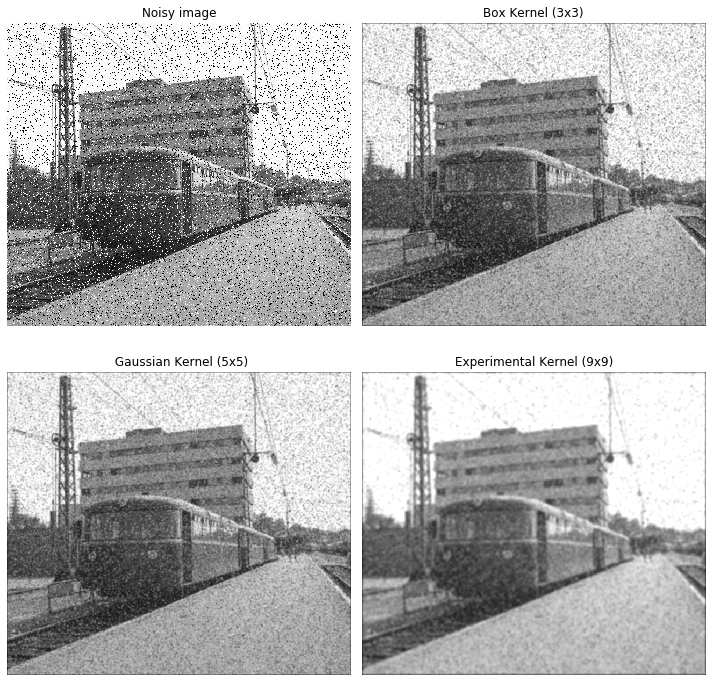

In [3]:
from PIL import Image, ImageDraw
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

def blur_image_colorless (image, kernel, string, i):

    output = sp.convolve2d(image, kernel, 'same')
    
    ax[i].imshow(output, vmin=0, vmax=255, cmap=plt.cm.gray)
    ax[i].set_title(string)    

# Prepare space to show images
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()
    
# Load image:
input_pixels = io.imread("1 - Train.jpg")

# Box Blur kernel
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]]

# Gaussian kernel
gaussian_kernel = [[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]

# Daniel kernel
experimental_kernel = [[ 1/2048,  4/2048,  6/2048,  8/2048,  10/2048,  8/2048,  6/2048,  4/2048,  1/2048],
                      [  4/2048, 16/2048, 24/2048, 32/2048,  40/2048, 32/2048, 24/2048, 16/2048,  4/2048],
                      [  6/2048, 24/2048, 36/2048, 48/2048,  60/2048, 48/2048, 36/2048, 24/2048,  6/2048],
                      [  8/2048, 32/2048, 48/2048, 64/2048,  80/2048, 64/2048, 48/2048, 32/2048,  8/2048],
                      [ 10/2048, 40/2048, 60/2048, 80/2048, 100/2048, 80/2048, 60/2048, 40/2048, 10/2048],
                      [  8/2048, 32/2048, 48/2048, 64/2048,  80/2048, 64/2048, 48/2048, 32/2048,  8/2048],
                      [  6/2048, 24/2048, 36/2048, 48/2048,  60/2048, 48/2048, 36/2048, 24/2048,  6/2048],
                      [  4/2048, 16/2048, 24/2048, 32/2048,  40/2048, 32/2048, 24/2048, 16/2048,  4/2048],
                      [  1/2048,  4/2048,  6/2048,  8/2048,  10/2048,  8/2048,  6/2048,  4/2048,  1/2048]]

ax[0].imshow(input_pixels, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')

blur_image_colorless(input_pixels, box_kernel, "Box Kernel (3x3)", 1)

blur_image_colorless(input_pixels, gaussian_kernel, " Gaussian Kernel (5x5)", 2)

blur_image_colorless(input_pixels, experimental_kernel,  "Experimental Kernel (9x9)", 3)

for a in ax:
    a.axis('off')

plt.tight_layout()

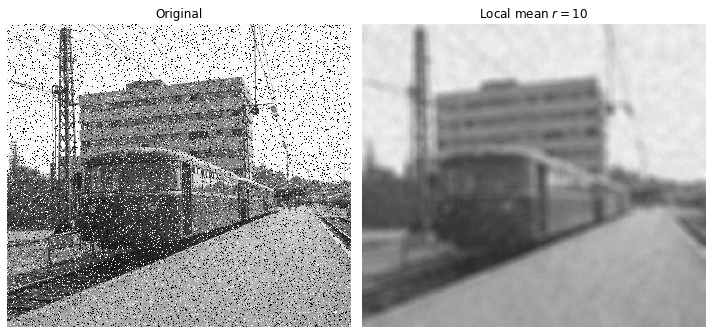

In [2]:
from skimage.filters.rank import mean
from skimage.morphology import disk

loc_mean = mean(io.imread("1 - Train.jpg"), disk(10))

fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0].imshow(io.imread("1 - Train.jpg"), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(loc_mean, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Local mean $r=10$')

for a in ax:
    a.axis('off')

plt.tight_layout()

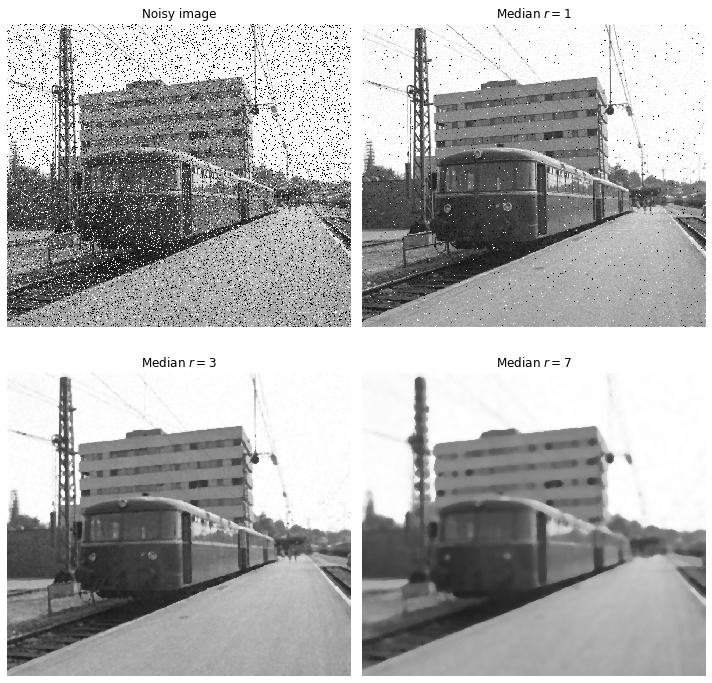

In [4]:
from skimage.filters.rank import median

noisy_image = io.imread("1 - Train.jpg")
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')

ax[1].imshow(median(noisy_image, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Median $r=1$')

ax[2].imshow(median(noisy_image, disk(3)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('Median $r=3$')

ax[3].imshow(median(noisy_image, disk(7)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('Median $r=7$')

for a in ax:
    a.axis('off')

plt.tight_layout()

Filtros passa-altas

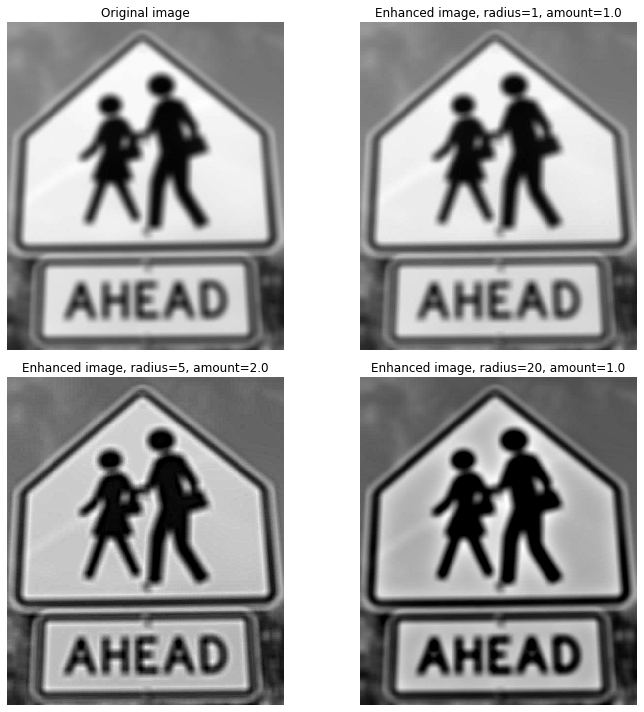

In [5]:
from skimage import data
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt


image = io.imread("2 - Road Sign.jpg")
result_1 = unsharp_mask(image, radius=1, amount=1)
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

Detecção de bordas

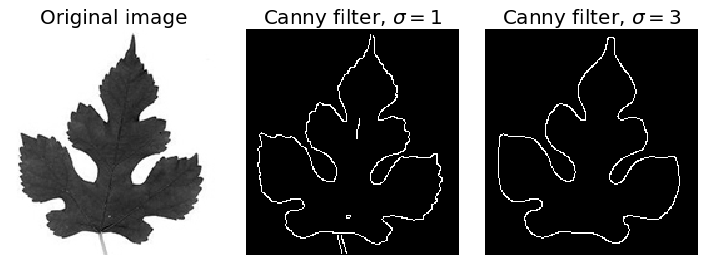

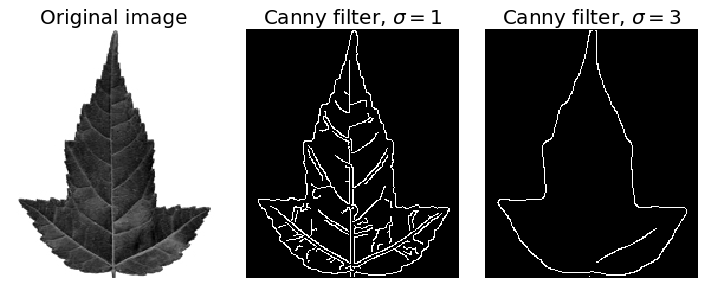

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.color import rgb2gray
from scipy import misc

from skimage import feature

im = io.imread('3 - Leaf One.jpg', flatten=True)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10), sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Original image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

im = io.imread('4 - Leaf Two.jpg', flatten=True)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10), sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Original image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

Transformada circular de Hough

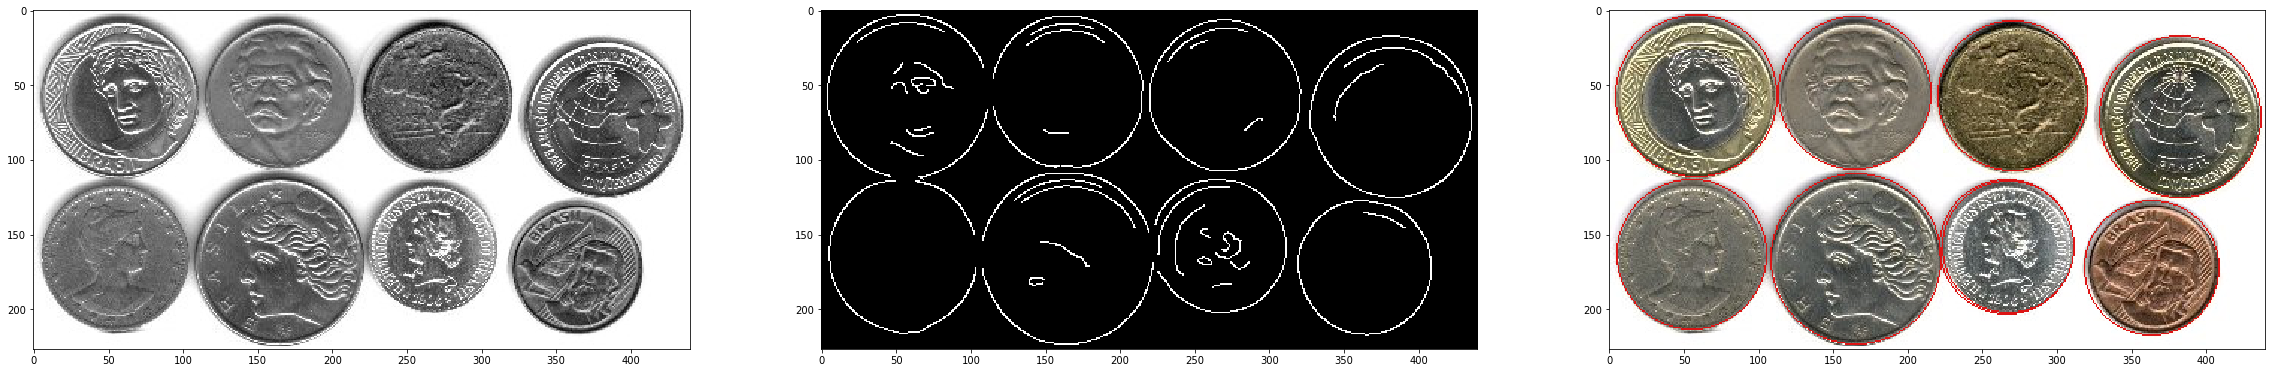

In [10]:
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.color import gray2rgb
from skimage.draw import circle_perimeter

imagem = rgb2gray( io.imread('5 - Brazilian Coins.jpg') )

canny_1 = feature.canny(imagem, sigma=2, low_threshold=0.3, high_threshold=0.5)

hough_radii = np.arange(40, 60, 1)
hough_res = hough_circle(canny_1, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=9)

image = gray2rgb(io.imread('5 - Brazilian Coins.jpg'))
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (220, 20, 20)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 10))
ax1.imshow(imagem, cmap=plt.cm.gray)
ax2.imshow(canny_1, cmap=plt.cm.gray)
ax3.imshow(image, cmap=plt.cm.gray)
plt.show()